In [1]:
!python --version

Python 3.10.14


In [2]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!pwd

/home/user/energygpt/chronos


In [4]:
datasets = ['Enernoc']

In [5]:
def load_results(datasets, result_type):
    results = []
    for dataset in datasets:
        print(dataset)
        files = glob.glob(f'/home/user/energygpt/chronos/results/{dataset}/*{result_type}*.csv')
        print(files)
        b_count = 0
        for f in files:            
            df = pd.read_csv(f)
            print(f, df.shape)
            #df = df[df.NRMSE <=1]
            #print(f, df.shape, ' After filtering')
            df.insert(0, 'dataset', dataset)
            df.insert(0, 'result_type', result_type)
            df['filename'] = df.filename.apply(lambda s: os.path.basename(s))
            results.append(df)                
            b_count += df.shape[0]
        print(dataset, b_count, '\n')
            
    results_df = pd.concat(results)
    return results_df

In [ ]:
result_type = 'agg_metrics'
test_agg = load_results(datasets, result_type)
print(test_agg.shape)

Enernoc
['/home/user/energygpt/chronos/results/Enernoc/agg_metrics_enernoc.csv']
/home/user/energygpt/chronos/results/Enernoc/agg_metrics_enernoc.csv (100, 9)
Enernoc 100 

(100, 11)


In [7]:
# test_agg.columns
test_agg

,result_type,dataset,filename,building,RMSE,MSE,MAE,MAPE,SMAPE,NRMSE,SQL
0,agg_metrics,Enernoc,enernoc.csv,767,131.746745,17357.204916,66.297645,0.084476,0.109117,0.160256,0.484660
1,agg_metrics,Enernoc,enernoc.csv,304,6.970003,48.580935,4.427931,0.032115,0.031945,0.048920,0.729579
2,agg_metrics,Enernoc,enernoc.csv,399,16.079866,258.562081,10.559852,0.031241,0.031075,0.049035,0.725703
3,agg_metrics,Enernoc,enernoc.csv,21,562.578072,316494.086933,315.846927,0.506740,0.316300,0.513182,0.662849
4,agg_metrics,Enernoc,enernoc.csv,805,52.859382,2794.114284,36.096681,0.469459,0.374834,0.449022,0.853970
...,...,...,...,...,...,...,...,...,...,...,...
95,agg_metrics,Enernoc,enernoc.csv,887,184.313608,33971.505964,94.890630,0.090223,0.087423,0.180642,0.416959
96,agg_metrics,Enernoc,enernoc.csv,42,186.585843,34814.276725,96.060461,0.090223,0.087423,0.180642,0.416959
97,agg_metrics,Enernoc,enernoc.csv,475,10.295610,105.999592,7.064390,0.026363,0.026163,0.038895,0.751460
98,agg_metrics,Enernoc,enernoc.csv,765,58.090867,3374.548873,39.402327,0.316530,0.272279,0.426584,0.723848


In [8]:
# finetuned_agg.dataset.value_counts().sum() + 1435
test_agg[['filename', 'building', 'NRMSE']].sort_values(by='NRMSE', ascending = False)

,filename,building,NRMSE
45,enernoc.csv,648,1.021035
8,enernoc.csv,731,1.020583
57,enernoc.csv,761,0.864487
85,enernoc.csv,745,0.595897
26,enernoc.csv,771,0.595824
...,...,...,...
31,enernoc.csv,386,0.042899
40,enernoc.csv,427,0.042642
84,enernoc.csv,744,0.038906
97,enernoc.csv,475,0.038895


In [9]:
test_agg[['SMAPE', 'NRMSE']].describe()

,SMAPE,NRMSE
count,100.000000,100.000000
mean,0.164213,0.257863
std,0.156085,0.203127
min,0.025464,0.035119
25%,0.054926,0.101034
50%,0.128688,0.213683
75%,0.215217,0.358577
max,0.873299,1.021035


In [13]:
filename = '/home/user/New_Buildings_Datasets/Commercial/Enernoc/csv-only/raw/meta/all_sites.csv'

In [14]:
df_sites = pd.read_csv(filename)
df_sites

,SITE_ID,INDUSTRY,SUB_INDUSTRY,SQ_FT,LAT,LNG,TIME_ZONE,TZ_OFFSET
0,6,Commercial Property,Shopping Center/Shopping Mall,161532,34.783001,-106.895250,America/Denver,-06:00
1,8,Commercial Property,Shopping Center/Shopping Mall,823966,40.320247,-76.404942,America/New_York,-04:00
2,9,Commercial Property,Corporate Office,169420,40.946751,-74.742087,America/New_York,-04:00
3,10,Commercial Property,Shopping Center/Shopping Mall,1029798,39.732504,-75.006861,America/New_York,-04:00
4,12,Commercial Property,Business Services,179665,39.694541,-74.899166,America/New_York,-04:00
...,...,...,...,...,...,...,...,...
95,786,Light Industrial,Food Processing,31727,42.949256,-112.184008,America/Denver,-06:00
96,805,Light Industrial,Food Processing,58421,42.244998,-71.060518,America/New_York,-04:00
97,808,Light Industrial,Food Processing,76915,40.406980,-75.070184,America/New_York,-04:00
98,832,Light Industrial,Manufacturing,186614,35.811100,-89.969061,America/Chicago,-05:00


In [17]:
df_sites.INDUSTRY.unique()

array(['Commercial Property', 'Education', 'Food Sales & Storage',
       'Light Industrial'], dtype=object)

In [18]:
df_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SITE_ID       100 non-null    int64  
 1   INDUSTRY      100 non-null    object 
 2   SUB_INDUSTRY  100 non-null    object 
 3   SQ_FT         100 non-null    int64  
 4   LAT           100 non-null    float64
 5   LNG           100 non-null    float64
 6   TIME_ZONE     100 non-null    object 
 7   TZ_OFFSET     100 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 6.4+ KB


In [19]:
df_sites.SITE_ID = df_sites.SITE_ID.astype('str')
df_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SITE_ID       100 non-null    object 
 1   INDUSTRY      100 non-null    object 
 2   SUB_INDUSTRY  100 non-null    object 
 3   SQ_FT         100 non-null    int64  
 4   LAT           100 non-null    float64
 5   LNG           100 non-null    float64
 6   TIME_ZONE     100 non-null    object 
 7   TZ_OFFSET     100 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.4+ KB


In [27]:
industry = {}
for each in df_sites.SITE_ID:
    industry[each] = df_sites[df_sites.SITE_ID == each]['INDUSTRY'].item()
industry  

{'6': 'Commercial Property',
 '8': 'Commercial Property',
 '9': 'Commercial Property',
 '10': 'Commercial Property',
 '12': 'Commercial Property',
 '13': 'Commercial Property',
 '14': 'Commercial Property',
 '21': 'Commercial Property',
 '22': 'Commercial Property',
 '25': 'Commercial Property',
 '29': 'Commercial Property',
 '30': 'Commercial Property',
 '31': 'Commercial Property',
 '32': 'Commercial Property',
 '36': 'Commercial Property',
 '41': 'Commercial Property',
 '42': 'Commercial Property',
 '44': 'Commercial Property',
 '45': 'Commercial Property',
 '49': 'Commercial Property',
 '51': 'Commercial Property',
 '55': 'Commercial Property',
 '56': 'Commercial Property',
 '65': 'Commercial Property',
 '78': 'Commercial Property',
 '88': 'Education',
 '92': 'Education',
 '99': 'Education',
 '100': 'Education',
 '101': 'Education',
 '103': 'Education',
 '109': 'Education',
 '111': 'Education',
 '116': 'Education',
 '136': 'Education',
 '137': 'Education',
 '144': 'Education',
 '15

In [34]:
test_agg.building = test_agg.building.astype('str')

In [35]:
def ind(row):
    return industry[row]

In [37]:
test_agg['industry'] = test_agg['building'].apply(ind)
test_agg

,result_type,dataset,filename,building,RMSE,MSE,MAE,MAPE,SMAPE,NRMSE,SQL,industry
0,agg_metrics,Enernoc,enernoc.csv,767,131.746745,17357.204916,66.297645,0.084476,0.109117,0.160256,0.484660,Light Industrial
1,agg_metrics,Enernoc,enernoc.csv,304,6.970003,48.580935,4.427931,0.032115,0.031945,0.048920,0.729579,Food Sales & Storage
2,agg_metrics,Enernoc,enernoc.csv,399,16.079866,258.562081,10.559852,0.031241,0.031075,0.049035,0.725703,Food Sales & Storage
3,agg_metrics,Enernoc,enernoc.csv,21,562.578072,316494.086933,315.846927,0.506740,0.316300,0.513182,0.662849,Commercial Property
4,agg_metrics,Enernoc,enernoc.csv,805,52.859382,2794.114284,36.096681,0.469459,0.374834,0.449022,0.853970,Light Industrial
...,...,...,...,...,...,...,...,...,...,...,...,...
95,agg_metrics,Enernoc,enernoc.csv,887,184.313608,33971.505964,94.890630,0.090223,0.087423,0.180642,0.416959,Light Industrial
96,agg_metrics,Enernoc,enernoc.csv,42,186.585843,34814.276725,96.060461,0.090223,0.087423,0.180642,0.416959,Commercial Property
97,agg_metrics,Enernoc,enernoc.csv,475,10.295610,105.999592,7.064390,0.026363,0.026163,0.038895,0.751460,Food Sales & Storage
98,agg_metrics,Enernoc,enernoc.csv,765,58.090867,3374.548873,39.402327,0.316530,0.272279,0.426584,0.723848,Light Industrial


## agg - Test - ALL

In [38]:
combined = test_agg#pd.concat([test_agg, finetuned_agg])
#combined = pd.concat([test_agg, finetuned_agg])

combined.result_type = combined.result_type.str.replace('test_agg_metrics', 'Zero-shot')
combined.result_type = combined.result_type.str.replace('finetuned_agg_metrics', 'Fine-tuned')

cols = ['result_type', 'SMAPE', 'NRMSE']
res_agg1 = combined[cols].groupby(['result_type']).agg( {'SMAPE': ['mean', 'std', 'median'],
                                                        'NRMSE': ['mean', 'std', 'median']})

# res_agg1.mul(100).round(2).to_csv('./results_finetuned/commercial.csv')
# res_agg1.mul(100).round(2).to_latex('./results_finetuned/commercial.tex')
res_agg1.mul(100).round(2)

SMAPE                NRMSE              
              mean    std median   mean    std median
result_type                                          
agg_metrics  16.42  15.61  12.87  25.79  20.31  21.37

In [11]:
combined

,result_type,dataset,filename,building,RMSE,MSE,MAE,MAPE,SMAPE,NRMSE,SQL
0,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_lodging_Stephen,6.585594,43.370047,4.390836,0.052777,0.051054,0.080739,0.693951
1,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_education_Virginia,7.305732,53.373726,3.750670,0.468725,0.325889,0.662080,0.815909
2,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_lodging_Stephan,2.477205,6.136543,1.679378,0.056696,0.054966,0.080852,0.649219
3,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_office_Israel,16.635654,276.744975,10.767507,0.099055,0.088836,0.134294,0.643978
4,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_education_Lilly,20.419247,416.945651,12.219198,0.065485,0.062883,0.107479,0.785425
...,...,...,...,...,...,...,...,...,...,...,...
128,agg_metrics,BDG-2,Fox_clean=2017.csv,Fox_education_Delma,28.961822,838.787134,11.931151,0.282974,0.174253,0.379986,1.011033
129,agg_metrics,BDG-2,Fox_clean=2017.csv,Fox_office_Edythe,12.680915,160.805605,8.213451,0.074205,0.072460,0.114208,0.593393
130,agg_metrics,BDG-2,Fox_clean=2017.csv,Fox_assembly_Carlos,23.219819,539.160002,12.430957,0.113236,0.106331,0.215289,0.777167
131,agg_metrics,BDG-2,Fox_clean=2017.csv,Fox_education_Jaclyn,15.504398,240.386347,9.267060,0.048839,0.046721,0.080444,0.659815


In [12]:
combined.filename.value_counts()

filename
Rat_clean=2016.csv        277
Rat_clean=2017.csv        262
Fox_clean=2017.csv        133
Fox_clean=2016.csv        132
Panther_clean=2017.csv    105
Bear_clean=2017.csv        91
Bear_clean=2016.csv        78
Name: count, dtype: int64

## add - Test vs. Finetuned - by dataset

In [13]:
#combined = pd.concat([test_agg, finetuned_agg])
#cols = ['result_type', 'dataset', 'sMAPE', 'NRMSE']
cols = ['result_type', 'dataset', 'NRMSE']
res_agg2 = combined[cols].groupby(['result_type', 'dataset']).agg( {#'sMAPE': ['mean', 'std', 'median'],
                                                                    #'NRMSE': ['mean', 'std', 'median']})
    'NRMSE': ['median']})

# res_agg2.mul(100).round(2).to_csv('./results_finetuned/commercial_by_dataset.csv')
# res_agg2.mul(100).round(2).to_latex('./results_finetuned/commercial_by_dataset.tex')
res_agg2.mul(100).round(2)

,,NRMSE
,,median
result_type,dataset,
agg_metrics,BDG-2,15.72


In [12]:
#combined = pd.concat([test_agg, finetuned_agg])
#cols = ['result_type', 'dataset', 'sMAPE', 'NRMSE']
cols = ['result_type', 'dataset', 'filename', 'NRMSE']
res_agg2 = combined[cols].groupby(['result_type', 'dataset', 'filename']).agg( {#'sMAPE': ['mean', 'std', 'median'],
                                                                    #'NRMSE': ['mean', 'std', 'median']})
    'NRMSE': ['median']})

#res_agg2.mul(100).round(2).to_csv('./results_finetuned/commercial_by_dataset.csv')
#res_agg2.mul(100).round(2).to_latex('./results_finetuned/commercial_by_dataset.tex')
res_agg2.mul(100).round(2)

NRMSE
                                           median
result_type dataset filename                     
agg_metrics BDG-2   Bear_clean=2016.csv     12.73
                    Bear_clean=2017.csv     15.26
                    Fox_clean=2016.csv      13.62
                    Fox_clean=2017.csv      13.89
                    Panther_clean=2017.csv  12.41
                    Rat_clean=2016.csv      16.37
                    Rat_clean=2017.csv      17.59

Index(['Food sales & storage (25)', 'Commercial property (25)',
       'Education (25)', 'Light industrial (25)'],
      dtype='object', name='industry')


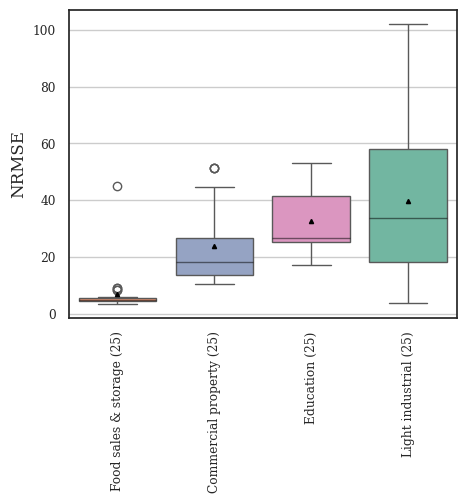

In [50]:
def con(row, ty):
    for i in ty:
        if row == i:
            op = f'{row} ({ty[row]})'
            return op

import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set()  # crazy big
seaborn.set(style='white', font_scale=1)
plt.figure(figsize=(5, 4))  # crazy big
# sns.set_theme(style="whitegrid")

date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 14})
plt.rcParams["font.family"] = "serif"
# plt.rcParams["figure.figsize"] = (7.5, 3.3*1.5)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.25
plt.rcParams["axes.grid"] = True
# date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 12})
# plt.rcParams["font.family"] = "serif"


test_agg1 = test_agg.copy()

test_agg1.NRMSE = test_agg1.NRMSE * 100

# test_agg1['building_type'] = test_agg1.building.apply(lambda s: s.split('_')[1])
# test_agg1 = test_agg1[test_agg1.building_type != 'religion']
# test_agg1['site'] = test_agg1.building.apply(lambda s: s.split('_')[0])
test_agg1.industry = test_agg1.industry.str.capitalize()
ty = dict(test_agg1.industry.value_counts())
test_agg1['industry'] = test_agg1.industry.apply(con, ty = ty)


# Find the order
my_order = test_agg1.groupby(by=["industry"])["NRMSE"].median().sort_values().index
print(my_order)

res = seaborn.boxplot(x='industry', y='NRMSE', fill=True, hue='industry',
                      order=my_order,                       
                medianprops=dict(color="black", alpha=0.5),
                      showmeans=True,
                meanprops={
                       "markeredgecolor": "black",
                       "markersize": "3",
                'markerfacecolor':'black'},
                      palette='Set2',
                data=test_agg1)
res.tick_params(labelsize=8.8)
# res.set_yscale('log')

plt.title(label='')

plt.ylabel("NRMSE")
# plt.ylim(0,250)
plt.xlabel("")
plt.xticks(rotation=90)
# plt.grid(axis='y')
# plt.gcf().tight_layout()
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
#plt.legend()
plt.subplots_adjust(wspace=0.05, hspace=0)
# plt.savefig("chronos-bdg-error-building-type-boxplot.svg", format='svg', dpi=1500, bbox_inches='tight')
plt.show()

In [28]:
combined.columns

Index(['result_type', 'dataset', 'filename', 'building', 'MSE', 'abs_error',
       'abs_target_sum', 'abs_target_mean', 'seasonal_error', 'MASE', 'MAPE',
       'sMAPE', 'MSIS', 'num_masked_target_values', 'QuantileLoss[0.1]',
       'Coverage[0.1]', 'QuantileLoss[0.2]', 'Coverage[0.2]',
       'QuantileLoss[0.3]', 'Coverage[0.3]', 'QuantileLoss[0.4]',
       'Coverage[0.4]', 'QuantileLoss[0.5]', 'Coverage[0.5]',
       'QuantileLoss[0.6]', 'Coverage[0.6]', 'QuantileLoss[0.7]',
       'Coverage[0.7]', 'QuantileLoss[0.8]', 'Coverage[0.8]',
       'QuantileLoss[0.9]', 'Coverage[0.9]', 'RMSE', 'NRMSE', 'ND',
       'wQuantileLoss[0.1]', 'wQuantileLoss[0.2]', 'wQuantileLoss[0.3]',
       'wQuantileLoss[0.4]', 'wQuantileLoss[0.5]', 'wQuantileLoss[0.6]',
       'wQuantileLoss[0.7]', 'wQuantileLoss[0.8]', 'wQuantileLoss[0.9]',
       'mean_absolute_QuantileLoss', 'mean_wQuantileLoss', 'MAE_Coverage',
       'OWA'],
      dtype='object')

In [31]:
# cumulative erros
# less < 5,
# 5-10
# 15-20
# 20-25
# 25-30
# 30-40
# >40

In [51]:
test_agg1 = combined.copy()
# test_agg1['industry'] = test_agg1.building.apply(lambda s: s.split('_')[1])
# test_agg1['site'] = test_agg1.building.apply(lambda s: s.split('_')[0])
cols = ['result_type', 'industry', 'NRMSE']
res_agg2 = test_agg1[cols].groupby(['result_type', 'industry']).agg( {#'sMAPE': ['mean', 'std', 'median'],
                                                                    #'NRMSE': ['mean', 'std', 'median']})
    'NRMSE': ['median']})
res_agg2

res_agg2 = pd.DataFrame(res_agg2)
res_agg2

NRMSE
                                    median
result_type industry                      
agg_metrics Commercial Property   0.180648
            Education             0.267865
            Food Sales & Storage  0.049044
            Light Industrial      0.338220

In [18]:
test_agg1

,result_type,dataset,filename,building,RMSE,MSE,MAE,MAPE,SMAPE,NRMSE,SQL,building_type,site
0,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_lodging_Stephen,6.585594,43.370047,4.390836,0.052777,0.051054,0.080739,0.693951,lodging,Fox
1,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_education_Virginia,7.305732,53.373726,3.750670,0.468725,0.325889,0.662080,0.815909,education,Fox
2,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_lodging_Stephan,2.477205,6.136543,1.679378,0.056696,0.054966,0.080852,0.649219,lodging,Fox
3,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_office_Israel,16.635654,276.744975,10.767507,0.099055,0.088836,0.134294,0.643978,office,Fox
4,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_education_Lilly,20.419247,416.945651,12.219198,0.065485,0.062883,0.107479,0.785425,education,Fox
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,agg_metrics,BDG-2,Fox_clean=2017.csv,Fox_education_Delma,28.961822,838.787134,11.931151,0.282974,0.174253,0.379986,1.011033,education,Fox
129,agg_metrics,BDG-2,Fox_clean=2017.csv,Fox_office_Edythe,12.680915,160.805605,8.213451,0.074205,0.072460,0.114208,0.593393,office,Fox
130,agg_metrics,BDG-2,Fox_clean=2017.csv,Fox_assembly_Carlos,23.219819,539.160002,12.430957,0.113236,0.106331,0.215289,0.777167,assembly,Fox
131,agg_metrics,BDG-2,Fox_clean=2017.csv,Fox_education_Jaclyn,15.504398,240.386347,9.267060,0.048839,0.046721,0.080444,0.659815,education,Fox


In [33]:
test_agg1.building_type.apply(con)

0         lodging (78)
1      education (456)
2         lodging (78)
3         office (117)
4      education (456)
            ...       
128    education (456)
129       office (117)
130     assembly (149)
131    education (456)
132       office (117)
Name: building_type, Length: 1078, dtype: object

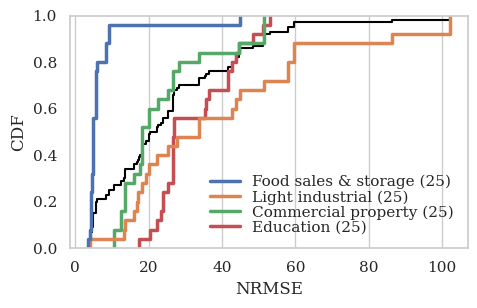

In [66]:
def con(row, ty):
    for i in ty:
        if row == i:
            op = f'{row} ({ty[row]})'
            return op

# sns.set()  # crazy big
sns.set_theme(style="whitegrid", font_scale=1.0)

date_formater = mdates.DateFormatter('%b, %d')
plt.rcParams.update({'font.size': 14})
plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.figsize"] = (5, 3.3)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
# plt.figure(figsize=(5, 3.3))
fig, ax = plt.subplots()


copy_df = test_agg['NRMSE'].reset_index()
all_df = pd.DataFrame(copy_df['NRMSE'] * 100)
#assembly_df
all_df['cdf'] = all_df.rank(method = 'average', pct = True)
ax_c = seaborn.ecdfplot(data=all_df.sort_values('NRMSE'), x="NRMSE", ax=ax, color='black', lw=1.5)
# all_df.sort_values('NRMSE').plot(x = 'NRMSE', y = 'cdf', grid = True, color = 'black')
# median = all_df.sort_values('NRMSE').quantile(0.5)
# #plt.scatter(x = median['NRMSE'], y = median['cdf'], color = 'red')
# #plt.text(x = xmedian['NRMSE'], median['cdf'])
# plt.text(median['NRMSE'],  median['cdf'], '({}, {})'.format(median['NRMSE'].round(2),  median['cdf'].round(2)))
# q_25 = all_df.sort_values('NRMSE').quantile(0.25)
# plt.scatter(x = q_25['NRMSE'], y = q_25['cdf'], color = 'red')
# plt.text(q_25['NRMSE'],  q_25['cdf'], '({}, {})'.format(q_25['NRMSE'].round(2),  q_25['cdf'].round(2)))
# q_75 = all_df.sort_values('NRMSE').quantile(0.75)
# plt.scatter(x = q_75['NRMSE'], y = q_75['cdf'], color = 'red')
# plt.text(q_75['NRMSE'],  q_75['cdf'], '({}, {})'.format(q_75['NRMSE'].round(2),  q_75['cdf'].round(2)))
# q_90 = all_df.sort_values('NRMSE').quantile(0.9)
# plt.scatter(x = q_90['NRMSE'], y = q_90['cdf'], color = 'red')
# plt.text(q_90['NRMSE'],  q_90['cdf'], '({}, {})'.format(q_90['NRMSE'].round(2),  q_90['cdf'].round(2)))

copy_df = test_agg.reset_index()
copy_df['NRMSE'] = copy_df['NRMSE'] * 100
# copy_df['building_type'] = copy_df.building.apply(lambda s: s.split('_')[1])
# copy_df['site'] = copy_df.building.apply(lambda s: s.split('_')[0])
# copy_df = copy_df[copy_df.building_type.isin(b_types)]
copy_df.industry = copy_df.industry.str.capitalize()
ty = dict(copy_df.industry.value_counts())
copy_df['industry'] = copy_df.industry.apply(con, ty = ty)

copy_df = copy_df.sort_values('NRMSE')


ax_s = seaborn.ecdfplot(data=copy_df, x="NRMSE", hue='industry', ax=ax, lw=2.5)
# ax_s.set_xscale('log')
# ax_s.set_xlim(0, 200)
# sns.move_legend(ax, "lower right", labelspacing=0.2, title='')
sns.move_legend(ax_s, "lower right", title='', labelspacing=0.05, frameon=False)
# sns.move_legend(ax_s, "lower right", title='', labelspacing=0.2, bbox_to_anchor=(1.7, 0.2))
# box = ax_s.get_position()
# print(box)
# ax_s.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position

# # Put a legend to the right side
# ax_s.legend(loc='upper right', bbox_to_anchor=(1.25, 0.5), ncol=1)

# ax_s.legend(bbox_to_anchor=(1.05, 1), loc='lower left', borderaxespad=0, title='Types')
plt.title(label='')

plt.ylabel("CDF")
#plt.ylim(0,125)
plt.xlabel("NRMSE")
#plt.xticks(rotation=90)
plt.grid(axis='y')
plt.gcf().tight_layout()
#plt.legend()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.savefig("Plots/chronos-enernoc-error-building-type-cdfplot.pdf", bbox_inches='tight')
plt.show()